# Mystery Star Template Fitting

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from random import random, seed
%matplotlib inline

#All zpt values are in Jy and go in the order: [U,B,V,I,J,H,K,3.6,4.5,5.8,8.0]
zpt=[1790,4063,3636,2416,1594,1024,666.7,280.9,179.7,115,64.13]

#All lambdaEff values are in micrometers and go in the order: [U,B,V,I,J,H,K,3.6,4.5,5.8,8.0]
lambdaEff=[0.36,0.44,0.555,0.79,1.235,1.662,2.159,3.55,4.493,5.731,7.872]

#Scales lambdaEff values to meters
lambdaEff_Plot=[0.36e-6,0.44e-6,0.555e-6,0.79e-6,1.235e-6,1.662e-6,2.159e-6,3.55e-6,4.493e-6,5.731e-6,7.872e-6]

def flux_convert_single(file_name):
    
# Takes an input of star magnitude and magnitude error data across 11 wavelengths.
# The magnitudes and magnitude errors are placed into an array and are converted
# into their equivalent flux values. The converted flux and flux error are then
# outputted.

    a,Umag,Uerr,Bmag,Berr,Vmag,Verr,Imag,Ierr,Jmag,Jerr,Hmag,Herr,Ksmag,Kserr,mag36,err36,mag45,err45,mag58,err58,mag80,err80 = np.genfromtxt(file_name,unpack=True)
    
    input_mag_array=[Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,mag36,mag45,mag58,mag80]    
    
    input_mag_array_err = [Uerr,Berr,Verr,Ierr,Jerr,Herr,Kserr,err36,err45,err58,err80]
    
    output_flux = np.zeros(11)
    output_flux_err = np.zeros(11)
    output_flux_eff = np.zeros(11)
    output_flux_err_eff = np.zeros(11)
    
    for i in range(11):
        output_flux[i] = 10**(-input_mag_array[i]/2.5)*zpt[i]
        output_flux_err[i] = 10**(-input_mag_array_err[i]/2.5)*zpt[i]
        output_flux_eff[i] = output_flux[i]*lambdaEff[i]
        output_flux_err_eff[i] = output_flux_err[i]*lambdaEff[i]
    return[output_flux_eff,output_flux_err_eff]


def find_norm(template,N):

# Multiplies inputed star model by normalization factor.

    return N*template

def find_HiRes(input_star_wavelength, input_star_flux, HiRes_SED_wavelength, HiRes_SED_flux, HiRes_SED_flux_err):

# Takes an inputed star wavelength, inputed star flux, HiRes SED Wavelength,
# HiRes SED Flux, and HiRes SED Flux Error. The inputed star wavelength is
# matched with its closest equivalent value in the HiRes SED Wavelength,
# which is then used to find the equivalent HiRes SED Flux and 
# HiRes SED Flux Error. This matched HiRes Flux and matched 
# HiRes Flux Error is then outputted.

    HiRes_matched_wavelength = np.zeros(11)
    HiRes_matched_flux = np.zeros(11)
    HiRes_matched_flux_err = np.zeros(11)
    temp_wavelength_array = np.zeros(100)
    
    for i in range(11):
        min_index = 0
        for j in range(100):
            temp_wavelength_array[j] = np.absolute(input_star_wavelength[i] - HiRes_SED_wavelength[j])            
            if(temp_wavelength_array[j]<temp_wavelength_array[j-1]):
                min_index = j        
        HiRes_matched_wavelength[i] = HiRes_SED_wavelength[min_index]
        HiRes_matched_flux[i] = HiRes_SED_flux[min_index]
        HiRes_matched_flux_err[i] = HiRes_SED_flux_err[min_index]
        
    return HiRes_matched_flux,HiRes_matched_flux_err

def star_fit_hi_res(input_star_data):
    
# Reads the magnitude data of an inputed star and converts it to flux data.
# High Resolution models of different star classifications are also read
# to specific variables, which are then assigned to arrays. These arrays
# are then used in the find_HiRes function for each of the 11 High Resolution
# SEDs. The matched fluxes and their associated errors are fit to a curve
# using the curve_fit function. The resulting popt1 array is then used to
# create an array of Chi^2 values. The array of Chi^2 values is checked
# to see which index has the smallest value, which is then used to find
# which High Resolution SED is the best fit with the inputed star. Both
# the flux and the flux error of the best fit are used to produce a
# a filled graph of the High Resolution SED and the overlayed star SED.

    output_flux,output_flux_err = flux_convert_single(input_star_data) 
    
    wavelength1,norm_flux1,std1= np.genfromtxt('A_Giants_HiRes_SED.txt',unpack=True)
    wavelength2,norm_flux2,std2 = np.genfromtxt('B_Giants_HiRes_SED.txt',unpack=True)
    wavelength3,norm_flux3,std3 = np.genfromtxt('B_MainSeq_HiRes_SED.txt',unpack=True)
    wavelength4,norm_flux4,std4 = np.genfromtxt('Be_HiRes_SED.txt',unpack=True)
    wavelength5,norm_flux5,std5 = np.genfromtxt('FGK_SuperGiants_HiRes_SED.txt',unpack=True)
    wavelength6,norm_flux6,std6 = np.genfromtxt('LBVs_HiRes_SED.txt',unpack=True)
    wavelength7,norm_flux7,std7 = np.genfromtxt('M_SuperGiants_HiRes_SED.txt',unpack=True)
    wavelength8,norm_flux8,std8 = np.genfromtxt('O_MainSeq_HiRes_SED.txt',unpack=True)
    wavelength9,norm_flux9,std9 = np.genfromtxt('O_SuperGiants_HiRes_SED.txt',unpack=True)
    wavelength10,norm_flux10,std10 = np.genfromtxt('WC_HiRes_SED.txt',unpack=True)
    wavelength11,norm_flux11,std11 = np.genfromtxt('WN_HiRes_SED.txt',unpack=True)
    
    # Starstring is used to output the name of the inputed data file
    # when it is generated on a graph.
    starstring = str(input_star_data)
    if starstring.endswith('.txt'):
        starstring = starstring[:-4]
        
    star_type = ['A Giant','B Giant','B Main Sequence','Be Star','F, G, and K Super Giant','LBV Star','M Super Giant',
                 'O Main Sequence','O Super Giant','WC Star','WN Star']
    norm_flux = [norm_flux1,norm_flux2,norm_flux3,norm_flux4,norm_flux5,norm_flux6,norm_flux7,norm_flux8,norm_flux9,
                 norm_flux10,norm_flux11]  
    wavelength = [wavelength1,wavelength2,wavelength3,wavelength4,wavelength5,wavelength6,wavelength7,wavelength8,
                 wavelength9,wavelength10,wavelength11]
    std = [std1,std2,std3,std4,std5,std6,std7,std8,std9,std10,std11]
    
    HiRes_matched_flux = np.zeros((11,11))
    HiRes_matched_flux_err = np.zeros((11,11))
    
    popt1 = [0,0,0,0,0,0,0,0,0,0,0]
    pcov = np.zeros(11)
    chisq1 = [0,0,0,0,0,0,0,0,0,0,0]
    best_star_fit = 0
   
    for j in range(11):
        HiRes_matched_flux[j],HiRes_matched_flux_err[j] = find_HiRes(lambdaEff_Plot,output_flux,wavelength[j],norm_flux[j],std[j])      
    
    for i in range(11):
        popt1[i],pcov[i] = curve_fit(find_norm,HiRes_matched_flux[i],output_flux,sigma=HiRes_matched_flux_err[i]) 
        chisq1[i] = np.sum(np.abs((output_flux-find_norm(HiRes_matched_flux[i],*popt1[i]))**2/
                                  find_norm(HiRes_matched_flux_err[i],*popt1[i])**2))
        
    best_star_fit = chisq1.index(min(chisq1))
    
    best_star_error = HiRes_matched_flux_err[best_star_fit] 
    
    # Median Error for J-band for better plot aesthetics
    best_star_error[4] = np.median(best_star_error) 
    
    y_low = (norm_flux[best_star_fit] - std[best_star_fit]) * popt1[best_star_fit]
    y_high = (norm_flux[best_star_fit] + std[best_star_fit])* popt1[best_star_fit]

    # Normalizes the matched flux in order to properly scale it with the model.
    HiRes_matched_flux = find_norm(HiRes_matched_flux[i],*popt1[i])
        
    plt.figure(3)
    plt.plot(lambdaEff_Plot,output_flux,'--o',label= starstring + ' SED')
    plt.fill_between(wavelength[best_star_fit],y_low,y_high,alpha=0.2,label= star_type[best_star_fit] + ' HiRes SED',color='tab:orange')
    plt.semilogx()
    plt.legend(fontsize=12)
    plt.xlabel(r'$\lambda$ (m)',fontsize=12)
    plt.ylabel(r'$\lambda F_{\lambda}$ (normalized)',fontsize=12)
    plt.title(starstring + ' vs ' + star_type[best_star_fit], fontsize=14)
    plt.xlim(3e-7,1e-5)
    
    print('chi^2 = {:.5f}'.format(chisq1[best_star_fit]))

chi^2 = 14.07778


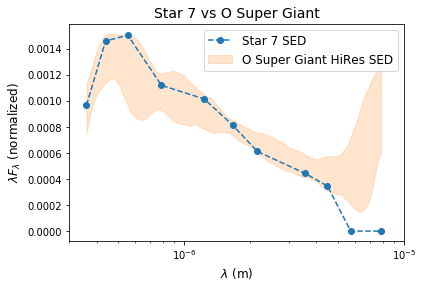

In [5]:
star_fit_hi_res('Star 7.txt')